# Dual CRISPR Screen Analysis
# Step 7: Abundance Thresholds
Amanda Birmingham, CCBB, UCSD (abirmingham@ucsd.edu)

## Instructions

To run this notebook reproducibly, follow these steps:
1. Click **Kernel** > **Restart & Clear Output**
2. When prompted, click the red **Restart & clear all outputs** button
3. Fill in the values for your analysis for each of the variables in the [Input Parameters](#Input-Parameters) section
4. Click **Cell** > **Run All**

## Input Parameters

In [18]:
g_timestamp = ""
g_dataset_name = "20160706_HeLa_A549_CV4"
g_count_alg_name = 'heuristic_v1'
g_prepped_counts_run_prefix = "A549_CV4_counts_w_everything_pseudo"
g_prepped_counts_dir = ('/Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/'
    'test_files/known_goods')
g_min_count_limit = 10 #Note: in absolute counts, not log2.  Unchanged from earlier--10 seems to work well.
g_max_fraction_acceptable_spline_density_diff = 0.02 # % of diff between max spline and min density
g_max_fraction_counts_excluded = 0.95 # any threshold throwing out >x% of counts is not acceptable
g_thresholds_dir = ('/Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/'
    'test_files/test_outputs/notebook7_A549_CV4_counts_w_everything')
g_thresholds_run_prefix = "A549_CV4_counts_w_everything"
g_code_location = '/Users/Birmingham/Work/Repositories/ccbb_tickets_2017/mali-dual-crispr-pipeline/src/python/'

In [19]:
import inspect
import sys
sys.path.append(g_code_location)

import ccbbucsd.utilities.analysis_run_prefixes as ns_runs
import ccbbucsd.utilities.files_and_paths as ns_files
import ccbbucsd.utilities.notebook_logging as ns_logs


def describe_var_list(input_var_name_list):
    description_list =  ["{0}: {1}\n".format(name, eval(name)) for name in input_var_name_list]
    return "".join(description_list)


ns_logs.set_stdout_info_logger()

In [20]:
g_timestamp = ns_runs.check_or_set(g_timestamp, ns_runs.get_timestamp())
g_thresholds_run_prefix = ns_runs.check_or_set(g_thresholds_run_prefix,
    ns_runs.get_run_prefix(g_dataset_name, g_count_alg_name, g_timestamp))
print(describe_var_list(['g_timestamp', 'g_thresholds_run_prefix']))
ns_files.verify_or_make_dir(g_thresholds_dir)

g_timestamp: 20170313165141
g_thresholds_run_prefix: A549_CV4_counts_w_everything



## R Magic Import and Set-Up

In [21]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [22]:
from rpy2.robjects import r
import rpy2.robjects as robjects

gR = robjects.r

## Scoring-Ready Counts File Load

In [23]:
import ccbbucsd.malicrispr.scoring_prep as ns_prep
print(inspect.getsource(ns_prep.get_prepped_file_suffix))

def get_prepped_file_suffix():
    return "timepoint_counts.txt"



In [24]:
import ccbbucsd.malicrispr.construct_file_extracter as ns_extracter
print(inspect.getsource(ns_extracter.get_construct_header))
print(inspect.getsource(ns_extracter.get_potential_annotation_headers))

def get_construct_header():
    return _CONSTRUCT_ID

def get_potential_annotation_headers():
    return [_CONSTRUCT_ID, _PROBE_A_SEQ, _PROBE_B_SEQ, _PROBE_A_NAME, _PROBE_B_NAME, _TARGET_A_NAME, _TARGET_B_NAME,
            _TARGET_PAIR_ID, _PROBE_PAIR_ID]



In [25]:
import pandas

def get_prepped_counts_only_df(prepped_counts_dir, prepped_counts_run_prefix):
    prepped_counts_suffix = ns_prep.get_prepped_file_suffix()
    prepped_counts_fp = ns_files.build_multipart_fp(prepped_counts_dir, [prepped_counts_run_prefix, 
                                                                         prepped_counts_suffix])       
    prepped_counts_df = pandas.read_table(prepped_counts_fp, index_col=ns_extracter.get_construct_header())
    total_headers = list(prepped_counts_df.columns.values)
    unwanted_headers = ns_extracter.get_potential_annotation_headers()
    count_headers = [x for x in total_headers if x not in unwanted_headers]
    return prepped_counts_df.loc[:, count_headers]

In [26]:
g_prepped_counts_only_df = get_prepped_counts_only_df(g_prepped_counts_dir, g_prepped_counts_run_prefix)
g_prepped_counts_only_df

,A549CV4_T3_1,A549CV4_T3_2,A549CV4_T14_1,A549CV4_T14_2,A549CV4_T21_1,A549CV4_T21_2,A549CV4_T28_1,A549CV4_T28_2
construct_id,,,,,,,,
ABL1_chr9_133589790__ADA_chr20_43257696,226,187,153,459,69,303,40,167
ABL1_chr9_133589790__ADA_chr20_43257769,208,271,320,123,155,174,157,285
ABL1_chr9_133589790__ALK_chr2_29541172,297,259,384,65,322,28,531,31
ABL1_chr9_133589790__ALK_chr2_30143522,231,277,686,49,1837,82,3620,32
ABL1_chr9_133589790__ARID1A_chr1_27056288,415,895,246,410,535,262,431,633
ABL1_chr9_133589790__ARID2_chr12_46205318,412,569,386,366,403,182,345,433
ABL1_chr9_133589790__ARID2_chr12_46254608,257,151,540,331,293,349,398,163
ABL1_chr9_133589790__ATM_chr11_108098350,339,494,408,67,223,252,249,292
ABL1_chr9_133589790__ATM_chr11_108098390,180,75,80,170,36,211,11,268


## Variable Transfer from Python to R

In [27]:
# 'temp' assignments suppress printing of cruft stdout
temp = gR.assign('gPreppedCountsDf', g_prepped_counts_only_df)
temp = gR.assign('gMinCountLimit', g_min_count_limit)
temp = gR.assign('gMaxFractionAcceptableSplineDensityDiff', g_max_fraction_acceptable_spline_density_diff)
temp = gR.assign('gMaxFractionCountsExcluded', g_max_fraction_counts_excluded)

##  R Set-Up

In [28]:
%%R

options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))
options(repr.plot.width=7, repr.plot.height=7)    
options(digits=10)

## Abundance-Threshold Identification Heuristic

In [29]:
%%R

gManualColor = "black"
gMinimumsColor = "orange"
gMaximumsColor = "turquoise"
gHistogramColor = "blue"
gDensityColor = "lightgreen"
gSplineColor = "lightpink"
gChosenColor = "red"
gSpar = NULL


extremumIsAcceptable<-function(putativeThreshold, hist, maxCountFractionExcluded){
    result = FALSE
    if (!is.null(putativeThreshold)) {
        fractionCountsExcluded = getFractionCountsExcluded(hist, putativeThreshold, 
            maxCountFractionExcluded)
        result = fractionCountsExcluded<maxCountFractionExcluded
    }
    return(result)
}
    

getFractionCountsExcluded<-function(hist, putativeThreshold, maxCountFractionExcluded){
    tempHistDf = data.frame(mids=hist$mids, counts=hist$counts)
    eligibleHistDf = tempHistDf[which(hist$mids<putativeThreshold), ]
    result = sum(eligibleHistDf$counts)/sum(hist$counts)  
    return(result)    
}

findExtremaIndices<-function(objWithXandY, getMins=TRUE){
    relevantDiff = if(getMins==TRUE) 2 else -2
    indicesOfExtrema = which(diff(sign(diff(objWithXandY$y)))==relevantDiff)+1
    return(indicesOfExtrema) 
}
        
getlog2CountsAndFreqsAtExtrema<-function(densityObj, indicesOfExtrema){
    log2CountsAtExtrema = densityObj$x[indicesOfExtrema]
    densityFunc = approxfun(densityObj)
    freqsAtExtrema = densityFunc(log2CountsAtExtrema)
    result = data.frame(log2CountsAtExtrema, freqsAtExtrema)
    result = result[with(result, order(log2CountsAtExtrema)), ]   
    return(result)    
}
        
# general concept: identify the peak of the "main distribution", then look for the lowest point in the
# "valley" between it and the noise spike at the low end of the counts histogram.  
# Not all count distributions have this general shape; for all known cases that don't, this method
# will return NULL (rather than just silently picking a bad threshold).  
findSmallestMinLeftOfMax<-function(splineWithXandY, minCountLimit, hist, maxCountFractionExcluded){
    minLog2CountThreshold = log2(minCountLimit)
    result = NULL # assume failure
    
    #look for row indices of local interior maxima and local interior minima in input spline curve
    indicesOfMaxes = findExtremaIndices(splineWithXandY, FALSE)
    indicesOfMins = findExtremaIndices(splineWithXandY, TRUE)
    
    # give up if there aren't at least one of each; otherwise
    if (length(indicesOfMaxes)>0 & length(indicesOfMins)>0){
        # get x and y values in the rows representing the local interior maxima
        xAndYatMaxesDf = getlog2CountsAndFreqsAtExtrema(splineWithXandY, indicesOfMaxes)
        eligibleMaxesDf = xAndYatMaxesDf[which(
            xAndYatMaxesDf$log2CountsAtExtrema >= minLog2CountThreshold), ]

        # if there are no local interior maxima at x values gte the global minimum allowed, give up; otherwise
        if (nrow(eligibleMaxesDf)>0){
            # pick the x position of the eligible local interior maximum with the largest y value
            chosenMaxDf = eligibleMaxesDf[which(
                eligibleMaxesDf$freqsAtExtrema == max(eligibleMaxesDf$freqsAtExtrema)), ]
            rightmostLog2Count = chosenMaxDf$log2CountsAtExtrema[1]    

            # get x and y values in the rows representing the local interior minima
            xAndYatMinsDf = getlog2CountsAndFreqsAtExtrema(splineWithXandY, indicesOfMins)
            eligibleMinsDf = xAndYatMinsDf[which(
                xAndYatMinsDf$log2CountsAtExtrema >= minLog2CountThreshold &
                xAndYatMinsDf$log2CountsAtExtrema < rightmostLog2Count), ]

            # if there are no local interior minima with x values gte the global minimum allowed and
            # lt the x position of the chosen maximum, give up; otherwise            
            if (nrow(eligibleMinsDf)>0){
                # pick the x position of the eligible local interior minimum with the smallest y value
                chosenMinDf = eligibleMinsDf[which(
                    eligibleMinsDf$freqsAtExtrema == min(eligibleMinsDf$freqsAtExtrema)), ] 
                putativeResult = chosenMinDf$log2CountsAtExtrema
                # Only known situation where above logic picks a bad threshold is when all "real" 
                # data is monotonically decreasing but there is (at least one) minute local maximum 
                # in the noise at far right of the count distribution; extremumIsAcceptable sanity-checks
                # for that pathological case.
                if (extremumIsAcceptable(putativeResult, hist, maxCountFractionExcluded)){
                    result = putativeResult
                }
            }
        }
    }
    
    return(result)
}

# helper for findSplineAndDensityNearPoint
makeSplineAndDensityDf<-function(scaledDensityXandY, splineXandY){
    # Determine spline and (scaled) density y values at shared set of x values 
    # where neither is NA, then calculate difference between spline and density
    # at each of those points.
    splineFunc = approxfun(splineXandY)
    splineYAtDensityX = splineFunc(scaledDensityXandY$x)
    result = data.frame(x=scaledDensityXandY$x, splineY=splineYAtDensityX, 
        densityY=scaledDensityXandY$y)
    result = na.omit(result)
    result$y = result$splineY-result$densityY 
    return(result)
} 


# helper for findSplineAndDensityNearPoint
getNearnessThreshold<-function(splineAndDensityDf, maxSplineDensityDiff){
    # Get global maximum value of spline function at any x
    # Get global minimum of scaled density function at any x
    # NB: x for max and min need not (and usually won't) be the same
    # Use these values to find the maximum difference between spline
    # and scaled density y values (regardless of x), then define 
    # "near" to be when spline and scaled density y values for same x get within 
    # the specified arbitrary fraction of that difference.
    maxSplineY = max(splineAndDensityDf$splineY) 
    minDensityY = min(splineAndDensityDf$densityY)
    maxDiff = maxSplineY - minDensityY
    result = maxDiff * maxSplineDensityDiff
    return(result)
}


# general concept: find the leftmost point (greater than the global minimum allowed) 
# in the count distribution where the scaled density curve and the spline curve are 
# within the global arbitrary threshold of one another.  
# This gives worse results than findSmallestMinLeftOfMax on "good" count distributions,
# so it isn't the first-choice approach, but it makes a good fall-back for count
# distributions (especially noisy or low-signal ones) where findSmallestMinLeftOfMax
# fails to find a threshold.  Fails to find a threshold ONLY in cases where
# spline and density curve never get "near" each other over range of 
# counts in the underlying count distribution.
findSplineAndDensityNearPoint<-function(scaledDensityXandY, splineXandY, minCountLimit, 
    maxFractionAcceptableSplineDensityDiff, hist, maxCountFractionExcluded){
    
    log2minCountLimit = log2(minCountLimit)
    maxSplineDensityDiff = maxFractionAcceptableSplineDensityDiff
    result = NULL # assume failure  
    
    splineAndDensityDf = makeSplineAndDensityDf(scaledDensityXandY, splineXandY)
    nearnessThreshold = getNearnessThreshold(splineAndDensityDf, maxSplineDensityDiff)

    # if there are no records whose x positions are gte the global minimum allowed,
    # give up; otherwise
    eligibleSplineAndDensityDf = splineAndDensityDf[which(
        splineAndDensityDf$x >= log2minCountLimit), ]
    if (nrow(eligibleSplineAndDensityDf)>0){
        
        # Walk through all eligible x positions, from smallest toward largest.
        # Assuming you don't get lucky and just find an x value right on the threshold,
        # find the pair of x positions (if any such exist) that bracket the 
        # spot where the spline and density curves get "near enough" to each other.
        # Return the point half-way between these two x positions (note that this is
        # obviously a punt--I *could* do numerical approximation to find it, or 
        # set up a function that reached zero when the spline and density were
        # "near enough" and then optimize it, but frankly it just doesn't seem 
        # worth the trouble ...)
        putativeResult = NULL
        largestXgtThresh = NULL
        smallestXltThresh = NULL
        for (i in 1:nrow(eligibleSplineAndDensityDf)){
            currYval = eligibleSplineAndDensityDf$y[i]
            currXval = eligibleSplineAndDensityDf$x[i]
            if (currYval == nearnessThreshold) {
                putativeResult = currXval
                break
            } else if (currYval <= nearnessThreshold) {
                smallestLtThresh = currXval
                if (is.null(largestXgtThresh)) {
                    putativeResult = smallestLtThresh
                } else {
                    putativeResult = (smallestLtThresh - largestXgtThresh)/2 + largestXgtThresh
                }
                break
            } else { # (currYval > nearnessThreshold) 
                largestXgtThresh = currXval
            }
        }
        
        if (extremumIsAcceptable(putativeResult, hist, maxCountFractionExcluded)){
            result = putativeResult
        }           
    }    
    
    return(result)
}
        
analyzeCountsDist<-function(log2countsDfForSingleSample, rangeObj, minCountLimit, maxCountFractionExcluded,
    maxFractionAcceptableSplineDensityDiff){
    
    resultSummary = "No acceptable threshold found." # assume failure
    rge<-rangeObj
    increment = 0.05

    log2CurrCountsHist<-hist(log2countsDfForSingleSample,
        breaks=seq(0-increment,rge[2]+increment,by=increment),
        plot=FALSE)        

    # density curve
    scaleFactor = sum(log2CurrCountsHist$counts)*increment
    log2CurrCountsDensity<-density(log2countsDfForSingleSample)
    scaledLog2CurrCountsDensityDf = data.frame(x=log2CurrCountsDensity$x, 
        y=log2CurrCountsDensity$y*scaleFactor)

    # smoothing spline curve of non-zero freqs only
    log2CurrCountsHistXandY = data.frame(x=log2CurrCountsHist$mids, y=log2CurrCountsHist$count)
    nonZeroLog2CurrCountsHistXandY = log2CurrCountsHistXandY[which(log2CurrCountsHistXandY$y>0), ]    
    log2CurrCountsSpline = smooth.spline(nonZeroLog2CurrCountsHistXandY$x, nonZeroLog2CurrCountsHistXandY$y)

    # threshold selection
    putativeThreshold = findSmallestMinLeftOfMax(log2CurrCountsSpline, minCountLimit, 
        log2CurrCountsHist, maxCountFractionExcluded)
    if (!is.null(putativeThreshold)){
        resultSummary = "Smallest-local-minimum-in-valley method used."
    } else {
        putativeThreshold = findSplineAndDensityNearPoint(scaledLog2CurrCountsDensityDf, log2CurrCountsSpline,
            minCountLimit, maxFractionAcceptableSplineDensityDiff, log2CurrCountsHist, maxCountFractionExcluded)
        if (!is.null(putativeThreshold)){
            resultSummary = "Near-point-of-spline-and-density method used."
        }
    }    
    
    result = list(threshold = putativeThreshold, resultSummary=resultSummary,
                  histogram=log2CurrCountsHist,
                  scaledDensity=scaledLog2CurrCountsDensityDf, spline=log2CurrCountsSpline)
    return(result)
}

drawAnalyzedCountsDist<-function(sampleName, rangeObj, analysisResult, manualThreshold=NULL){
    rge<-rangeObj
    xPositions = seq(from = 0, to = ceiling(rge[2])+1, by = 1)
    xLabels = 2^(xPositions)
    titleText = paste0(sampleName,"\n", analysisResult$resultSummary)

    hist = analysisResult$histogram
    plot(hist, 
        col=gHistogramColor,
        border=FALSE,
        main=titleText,
        xaxt = 'n', 
        xlab=""
        )        

    axis(side = 1, at = xPositions, labels=xLabels, las=2)
    mtext("counts (pseudocount added to zeros only)", side=1, line=3)
    
    # density curve
    lines(analysisResult$scaledDensity,col=gDensityColor)

    # smoothing spline curve of non-zero freqs only
    lines(analysisResult$spline, col=gSplineColor)

    # rug plot of manual threshold, if any
    if (!is.null(manualThreshold)){
        rug(manualThreshold, col=gManualColor, lwd=3)    
    }

    # vertical line of selected threshold, if any
    analysisThreshold = analysisResult$threshold
    if (!is.null(analysisThreshold)){
        abline(v=analysisThreshold, col=gChosenColor) 
        fractionExcludedCounts = getFractionCountsExcluded(analysisResult$histogram, 
            analysisThreshold, maxCountFractionExcluded)
        percentExcludedCounts = fractionExcludedCounts*100          
        title(sub=paste0(format(round(percentExcludedCounts, 1), nsmall = 1), "% of counts excluded"))  
    }
}

analyzeAndDrawCountsDists<-function(multiSampleCountsDf, minCountLimit, maxCountFractionExcluded, 
                                    maxFractionAcceptableSplineDensityDiff, manualThresholds=NULL){
    
    resultDf = data.frame(sampleName = character(0), log2CountsThresh = numeric(0));
    
    multiSampleCountsDf[multiSampleCountsDf==0]<-1 #pseudocounts
    log2MultiSampleCountsDf = log2(multiSampleCountsDf)
    rangeObj = range(log2MultiSampleCountsDf) 
    
    for (i in 1:ncol(multiSampleCountsDf)) {
        currSampleName = colnames(multiSampleCountsDf)[i]
        log2countsDfForSingleSample = log2MultiSampleCountsDf[, i]
        analysisResult = analyzeCountsDist(log2countsDfForSingleSample, rangeObj, 
            minCountLimit, maxCountFractionExcluded, maxFractionAcceptableSplineDensityDiff)
        resultDf = rbind(resultDf, data.frame(sampleName=currSampleName, log2CountsThresh=analysisResult$threshold))
        

        currManualThreshold = NULL
        if (!is.null(manualThresholds)){
            if (length(manualThresholds)>=i){
                currManualThreshold = log2(manualThresholds[i]) 
            }
        }           
        
        drawAnalyzedCountsDist(currSampleName, rangeObj, analysisResult, currManualThreshold)
    }
    
    return(resultDf)
}

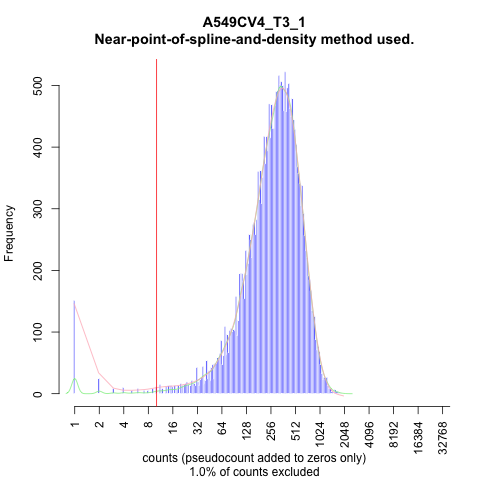

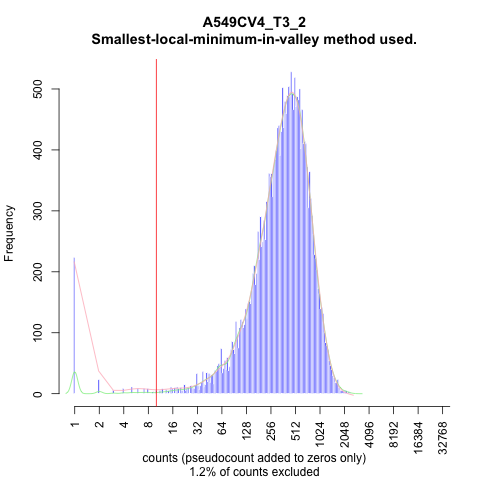

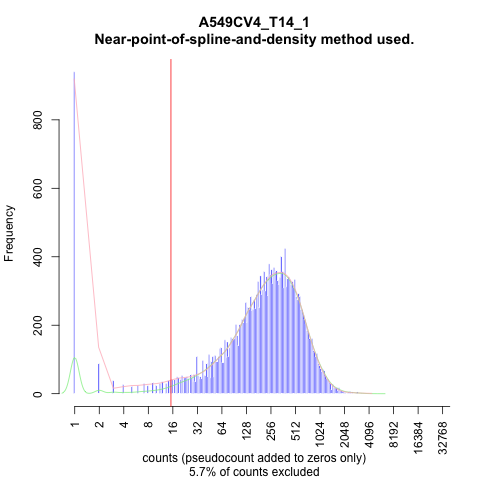

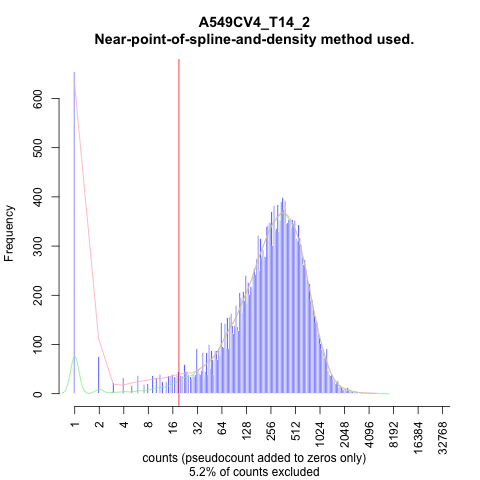

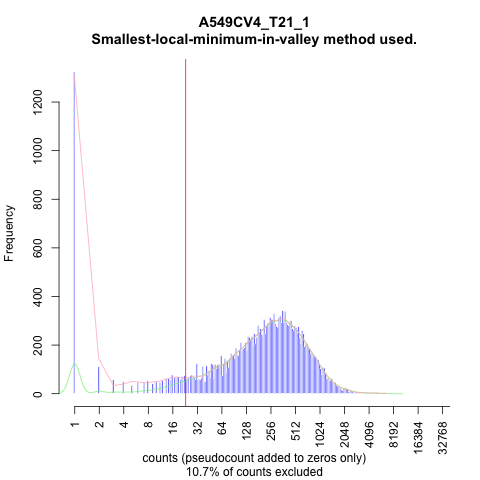

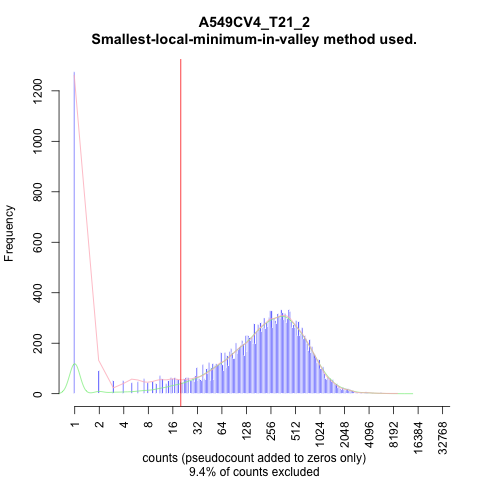

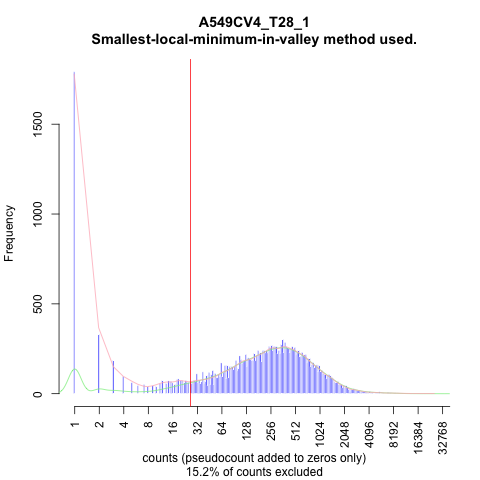

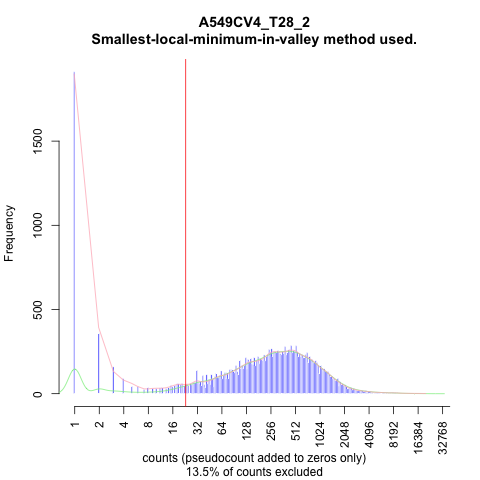

In [30]:
%%R
gThresholdsDf = analyzeAndDrawCountsDists(gPreppedCountsDf, gMinCountLimit, gMaxFractionCountsExcluded, 
                                  gMaxFractionAcceptableSplineDensityDiff) 

In [31]:
%R gThresholdsDf

,sampleName,log2CountsThresh
1,A549CV4_T3_1,3.339758
2,A549CV4_T3_2,3.325000
3,A549CV4_T14_1,3.922481
4,A549CV4_T14_2,4.247924
5,A549CV4_T21_1,4.525000
6,A549CV4_T21_2,4.325000
7,A549CV4_T28_1,4.725000
8,A549CV4_T28_2,4.525000


## Output to File

In [32]:
import ccbbucsd.malicrispr.scoring_prep as ns_prep
print(inspect.getsource(ns_prep.get_sample_name_header))
print(inspect.getsource(ns_prep.get_abundance_thresh_header))
print(inspect.getsource(ns_prep.get_abundance_thresh_file_suffix))

def get_sample_name_header():
    return "sampleName"

def get_abundance_thresh_header():
    return "log2CountsThresh"

def get_abundance_thresh_file_suffix():
    return "abundance_thresholds.txt"



In [33]:
def write_thresholds_file(thresholds_df, run_prefix, output_dir):  
    thresholds_df.columns = [ns_prep.get_sample_name_header(), ns_prep.get_abundance_thresh_header()]
    output_fp = ns_files.build_multipart_fp(output_dir, [run_prefix, ns_prep.get_abundance_thresh_file_suffix()])
    thresholds_df.to_csv(output_fp, index=False, sep='\t')

In [34]:
write_thresholds_file(gR['gThresholdsDf'], g_thresholds_run_prefix, g_thresholds_dir)